# Chapter12. 회귀분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


## 12.1. 단순회귀모형
- 회귀분석(regression analysis)이란 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법입니다. 이때 원인이 되는 변수를 설명변수(explanatory variable)라고 하고, 결과가 되는 변수를 반응변수(response variable)라고 합니다. 설명변수와 반응변수를 각각 독립변수와 종속변수라고 부르기도 합니다. 
- 단순회귀모형은 회귀분석에서 설명변수와 반응변수가 1개씩인 가장 단순한 모델

In [3]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

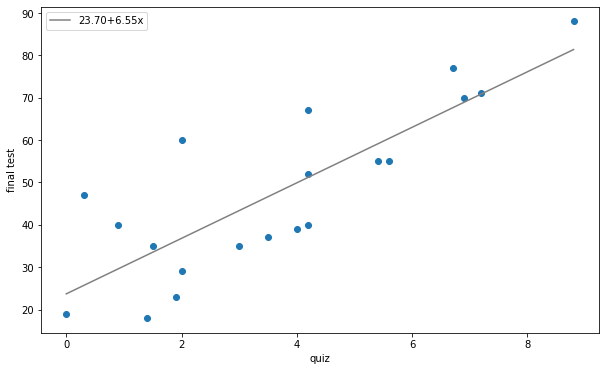

In [4]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

## 12.1.1. 회귀분석에서의 가설 
- 예측할 수 없는 부분을 오차항(error term)이라고 하고 $\epsilon$으로 나타내고, 기말고사 결과를 다음과 같이 나타낼 수 있다. 
- Yi = b0 +b1x+$\epsilon$
- 회귀분석에서 다음과 같은 2가지를 가정한다. 
- 1) 설명변수가 확률변수가 아니다. 
- 2) $\epsilon$은 서로 독립이고 N(0,$\sigma^{2}$)을 따른다

### statsmodels에 의한 회귀분석

In [5]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           8.59e-06
Time:                        00:02:22   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 12.1.3. 회귀계수

In [7]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [8]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

<ipython-input-8-db859e0f352c>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


(23.69949534673122, 6.553732606043082)

In [9]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [10]:
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [11]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

### 구간추정

In [12]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [13]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645705, 1.0685841387335373)

In [14]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796091272760252, 33.60289942070219)

In [15]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125889, 8.798744574960274)

In [16]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532021

In [17]:
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

In [18]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.0276442064401285

In [19]:
(1 - rv.cdf(t)) * 2

8.745298393186829e-05

## 12.2. 중회귀모형
- 설명변수가 2개이상인 모형을 중회귀모형이라고 함.

In [20]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           6.19e-06
Time:                        00:24:06   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 12.2.1. 회귀계수

In [21]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

In [22]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

<ipython-input-22-e24e98ac4cc2>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


(-1.8709143470995901, 6.4288783430023715, 4.191706546398687)

In [23]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

In [24]:
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [25]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.44025333254357735, 7.9431597602537956)

## 12.2.2. 가변수
- dummy variable

In [26]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           7.47e-05
Time:                        00:28:31   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


## 12.3. 모형의 선택

In [28]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           8.59e-06
Time:                        00:33:05   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [32]:
eps_hat = np.array(result.resid)
eps_hat # y-y_hat와 동일함 

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [34]:
# 회귀직선 적합도 
np.sum(eps_hat ** 2) 

2417.227825229262

## 12.3.1. 결정계수
- 결정계수는 모형의 데이터에 대한 적합도를 나타내는 기본적인 지표입니다. 
- 1에 가까울수록 모델은 데이텅 잘 들어맞는다고 생각할 수 있음. 

In [35]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [36]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999996)

In [37]:
exp_var / total_var

0.6763457665504996

In [38]:
np.corrcoef(x, y)[0, 1] ** 2

0.6763457665504998

## 12.3.2. 조정결정계수

In [39]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033057